<a href="https://colab.research.google.com/github/PascalAdriantha/Sentiment-Analysis/blob/main/Sentiment_Analysis_LSTM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install Keras-Preprocessing
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix,classification_report
import re


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.8 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
datasetAwal = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Textblob Data/Data_TextBlobed_10000.csv")

In [ ]:
dataset = datasetAwal.head(3000)

In [ ]:
#dataset = dataset[dataset.labels != "neutral"]
#dataset['tweets'] = dataset['tweets'].apply(lambda x: x.lower())
# removing special chars
#dataset['tweets'] = dataset['tweets'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
#
#dataset.head()

In [ ]:
#create cleansing function

def cleanTweets(text):
  text = re.sub(r'@[A-Za-z0-9]+','', text) #menghapus mentions
  text = re.sub(r'#','', text) #menghapus hashtag
  text = re.sub(r'RT[\s]+','', text) #menghapus RT
  text = re.sub(r'https?:\/\/\S+','', text) #menghapus links
  text = re.sub('[^a-zA-Z]', ' ', text).lower() #mengubah huruf kecil, menghapus tanda baca dan simbol
  return text

dataset['Cleaned Tweets'] = dataset['tweets'].apply(cleanTweets)

dataset[["tweets", "Cleaned Tweets"]]

<ipython-input-6-cfca84ea98e4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Cleaned Tweets'] = dataset['tweets'].apply(cleanTweets)


,tweets,Cleaned Tweets
0,ChatGPT: Optimizing Language Models for Dialog...,chatgpt optimizing language models for dialog...
1,"Try talking with ChatGPT, our new AI system wh...",try talking with chatgpt our new ai system wh...
2,ChatGPT: Optimizing Language Models for Dialog...,chatgpt optimizing language models for dialog...
3,"THRILLED to share that ChatGPT, our new model ...",thrilled to share that chatgpt our new model ...
4,"As of 2 minutes ago, @OpenAI released their ne...",as of minutes ago released their new chatg...
...,...,...
2995,ChatGPT https://t.co/heMojw0JUe,chatgpt
2996,Not sure if large language models are sentient...,not sure if large language models are sentient...
2997,I'm dead #ChatGPT https://t.co/KzQ2EjTlWb,i m dead chatgpt
2998,ChatGPT is a typical whataboutist. Next! https...,chatgpt is a typical whataboutist next


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [ ]:
def tokenizeTweet(text):
  tokenizedTweet = text.split()
  return tokenizedTweet
dataset['Tokenized'] = dataset['Cleaned Tweets'].apply(lambda x: tokenizeTweet(x))

<ipython-input-8-268bb53e51f7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Tokenized'] = dataset['Cleaned Tweets'].apply(lambda x: tokenizeTweet(x))


In [ ]:
dataset[["Cleaned Tweets", "Tokenized"]].head(25)

,Cleaned Tweets,Tokenized
0,chatgpt optimizing language models for dialog...,"[chatgpt, optimizing, language, models, for, d..."
1,try talking with chatgpt our new ai system wh...,"[try, talking, with, chatgpt, our, new, ai, sy..."
2,chatgpt optimizing language models for dialog...,"[chatgpt, optimizing, language, models, for, d..."
3,thrilled to share that chatgpt our new model ...,"[thrilled, to, share, that, chatgpt, our, new,..."
4,as of minutes ago released their new chatg...,"[as, of, minutes, ago, released, their, new, c..."
5,just launched chatgpt our new ai system which...,"[just, launched, chatgpt, our, new, ai, system..."
6,as of minutes ago released their new chatg...,"[as, of, minutes, ago, released, their, new, c..."
7,chatgpt coming out strong refusing to help me ...,"[chatgpt, coming, out, strong, refusing, to, h..."
8,penal just deployed a thing i ve been helping...,"[penal, just, deployed, a, thing, i, ve, been,..."
9,research preview of our newest model chatgpt ...,"[research, preview, of, our, newest, model, ch..."


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = nltk.stem.WordNetLemmatizer()
def stopword_text(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(all_stopwords)])


dataset['Lemmatized and Stopword'] = dataset['Tokenized'].apply(lambda x: stopword_text(x))

from nltk.stem import WordNetLemmatizer
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_words(text):
    words = text.split()
    words = [lemmatizer.lemmatize(word,pos='v') for word in words]
    return ' '.join(words)
dataset['Lemmatized and Stopword'] = dataset['Lemmatized and Stopword'].apply(lemmatize_words)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
<ipython-input-11-4f50e36f3e5d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Lemmatized and Stopword'] = dataset['Tokenized'].apply(lambda x: stopword_text(x))
<ipython-input-11-4f50e36f3e5d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Lemmatized and Stopword'] = dataset['Lemmatized and Stopword'].apply(lemmatize_words)


In [ ]:
dataset[["Tokenized", "Lemmatized and Stopword"]].head(25)

,Tokenized,Lemmatized and Stopword
0,"[chatgpt, optimizing, language, models, for, d...",chatgpt optimize language model dialogue
1,"[try, talking, with, chatgpt, our, new, ai, sy...",try talk chatgpt new ai system optimize dialog...
2,"[chatgpt, optimizing, language, models, for, d...",chatgpt optimize language model dialogue ai ma...
3,"[thrilled, to, share, that, chatgpt, our, new,...",thrill share chatgpt new model optimize dialog...
4,"[as, of, minutes, ago, released, their, new, c...",minute ago release new chatgpt n nand use right
5,"[just, launched, chatgpt, our, new, ai, system...",launch chatgpt new ai system optimize dialogue
6,"[as, of, minutes, ago, released, their, new, c...",minute ago release new chatgpt n nand use righ...
7,"[chatgpt, coming, out, strong, refusing, to, h...",chatgpt come strong refuse help stalk someone ...
8,"[penal, just, deployed, a, thing, i, ve, been,...",penal deploy thing help build last couple mont...
9,"[research, preview, of, our, newest, model, ch...",research preview newest model chatgpt n nwe tr...


In [ ]:
datasetNegative = dataset[ (dataset['labels']=='negative')]
datasetPositive = dataset[ (dataset['labels']=='positive')]

negativeList = datasetNegative['Lemmatized and Stopword'].tolist()
positiveList = datasetPositive['Lemmatized and Stopword'].tolist()

filtered_negative = ("").join(str(datasetNegative)) #convert the list into a string of spam
#filtered_negative = filtered_negative.lower()

filtered_positive = ("").join(str(datasetPositive)) #convert the list into a string of spam
#filtered_positive = filtered_positive.lower()

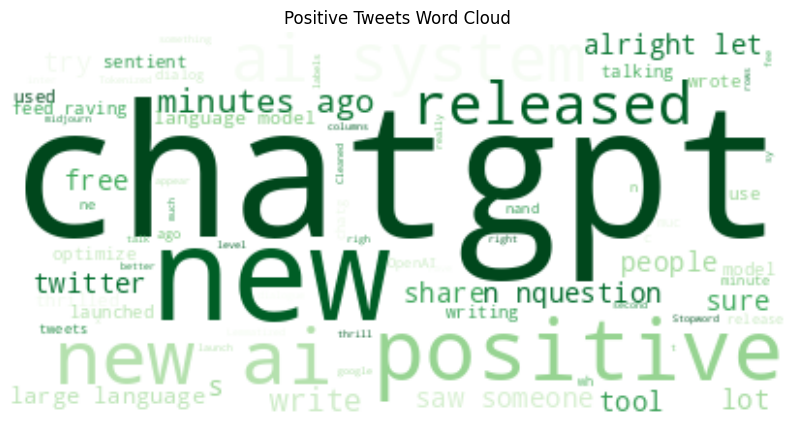

In [ ]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Greens").generate(filtered_positive)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Tweets Word Cloud")
plt.show()

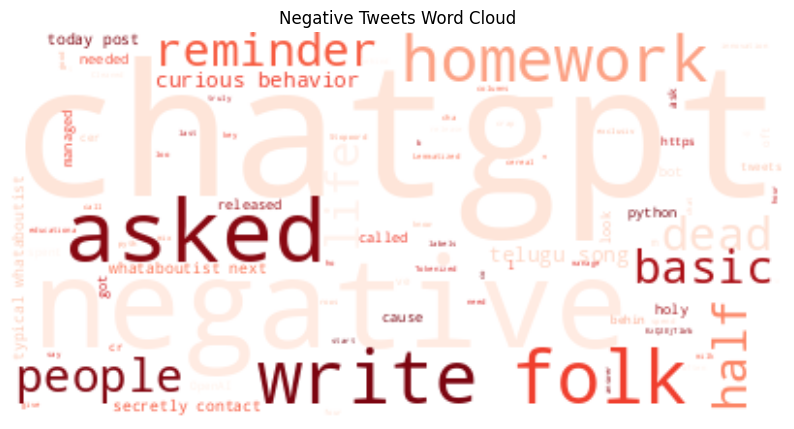

In [ ]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_negative)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative Tweets Word Cloud")
plt.show()

In [ ]:
print(dataset[ dataset['labels'] == 'positive'].size)
print(dataset[ dataset['labels'] == 'neutral'].size)
print(dataset[ dataset['labels'] == 'negative'].size)

for idx,row in dataset.iterrows():
    row[0] = row[0].replace('rt','')
dataset.head()

8120
5005
1875


,tweets,labels,Cleaned Tweets,Tokenized,Lemmatized and Stopword
0,ChatGPT: Optimizing Language Models for Dialog...,neutral,chatgpt optimizing language models for dialog...,"[chatgpt, optimizing, language, models, for, d...",chatgpt optimize language model dialogue
1,"Try talking with ChatGPT, our new AI system wh...",positive,try talking with chatgpt our new ai system wh...,"[try, talking, with, chatgpt, our, new, ai, sy...",try talk chatgpt new ai system optimize dialog...
2,ChatGPT: Optimizing Language Models for Dialog...,neutral,chatgpt optimizing language models for dialog...,"[chatgpt, optimizing, language, models, for, d...",chatgpt optimize language model dialogue ai ma...
3,"THRILLED to share that ChatGPT, our new model ...",positive,thrilled to share that chatgpt our new model ...,"[thrilled, to, share, that, chatgpt, our, new,...",thrill share chatgpt new model optimize dialog...
4,"As of 2 minutes ago, @OpenAI released their ne...",positive,as of minutes ago released their new chatg...,"[as, of, minutes, ago, released, their, new, c...",minute ago release new chatgpt n nand use right


In [ ]:
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(dataset['Lemmatized and Stopword'].values)
X = tokenizer.texts_to_sequences(dataset['Lemmatized and Stopword'].values)
X = pad_sequences(X, maxlen = 100)

In [ ]:
X[:2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   1,  42,  22,  11,  34],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [ ]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 35, 128)           256000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 35, 128)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 196)               254800    
                                                                 
 dense (Dense)               (None, 3)                 591       
                                                                 
Total params: 511,391
Trainable params: 511,391
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#Y = pd.get_dummies(dataset['labels']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,dataset['labels'], test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(2400, 35) (2400,)
(600, 35) (600,)


In [ ]:
!pip install -U imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
ROS = RandomOverSampler(sampling_strategy="not majority")
X_train_ros, y_train_ros = ROS.fit_resample(X_train, Y_train)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from collections import Counter
Counter(y_train_ros)

Counter({'positive': 1291, 'neutral': 1291, 'negative': 1291})

In [ ]:
y_train_ros = pd.get_dummies(y_train_ros).values
Y_test = pd.get_dummies(Y_test).values


In [ ]:
X_train.shape, Y_train.shape, X_train_ros.shape, y_train_ros.shape

((2400, 35), (2400,), (3873, 35), (3873, 3))

In [ ]:
X_train_ros.shape, y_train_ros.shape

((3873, 35), (3873, 3))

In [ ]:
batch_size = 128
model.fit(X_train_ros, y_train_ros, epochs = 10, batch_size=batch_size, verbose = 1)

Epoch 1/10
31/31 [==============================] - 31s 836ms/step - loss: 1.0280 - accuracy: 0.4800
Epoch 2/10
31/31 [==============================] - 28s 879ms/step - loss: 0.8237 - accuracy: 0.6636
Epoch 3/10
31/31 [==============================] - 15s 467ms/step - loss: 0.5115 - accuracy: 0.8058
Epoch 4/10
31/31 [==============================] - 15s 470ms/step - loss: 0.3390 - accuracy: 0.8823
Epoch 5/10
31/31 [==============================] - 15s 465ms/step - loss: 0.2351 - accuracy: 0.9231
Epoch 6/10
31/31 [==============================] - 15s 484ms/step - loss: 0.1715 - accuracy: 0.9486
Epoch 7/10
31/31 [==============================] - 15s 471ms/step - loss: 0.1364 - accuracy: 0.9610
Epoch 8/10
31/31 [==============================] - 16s 501ms/step - loss: 0.1124 - accuracy: 0.9682
Epoch 9/10
31/31 [==============================] - 15s 493ms/step - loss: 0.1058 - accuracy: 0.9685
Epoch 10/10
31/31 [==============================] - 16s 516ms/step - loss: 0.0963 - accura

In [ ]:
#Y_pred = model.predict_classes(X_test,batch_size = batch_size)

#Y_pred=model.predict(X_test) 
#classes_x=np.argmax(Y_pred,axis=1)

Y_pred = np.argmax(model.predict(X_test,batch_size = batch_size), axis=-1)


5/5 [==============================] - 1s 81ms/step


In [ ]:
df_test = pd.DataFrame({'true': Y_test.tolist(), 'pred':Y_pred})
df_test['true'] = df_test['true'].apply(lambda x: np.argmax(x))
print("confusion matrix\n",confusion_matrix(df_test.true, df_test.pred))
print(classification_report(df_test.true, df_test.pred))

confusion matrix
 [[ 32  13  30]
 [  7 140  45]
 [ 21  19 293]]
              precision    recall  f1-score   support

           0       0.53      0.43      0.47        75
           1       0.81      0.73      0.77       192
           2       0.80      0.88      0.84       333

    accuracy                           0.78       600
   macro avg       0.71      0.68      0.69       600
weighted avg       0.77      0.78      0.77       600



In [ ]:
Y_pred, Y_test.tolist()

(array([1, 0, 2, 2, 2, 1, 0, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 2, 0, 2, 2,
        2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 0, 2,
        1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1,
        1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1,
        2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2,
        2, 2, 1, 2, 2, 2, 1, 0, 2, 2, 2, 1, 2, 0, 2, 2, 2, 1, 1, 2, 0, 1,
        0, 2, 2, 1, 0, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1,
        1, 2, 2, 2, 1, 2, 2, 1, 2, 0, 2, 0, 1, 2, 0, 2, 2, 2, 1, 2, 0, 1,
        1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2,
        2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
        2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 2, 1,
        2, 0, 2, 2, 1, 1, 2, 2, 2, 0, 0, 2, 0, 1, 1, 1, 2, 1, 2, 2, 1, 1,
        2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 